6.658533277581982
21.39364617450456
31.14190175001151
32.57186213044781
32.729298089282246
32.729298089282246


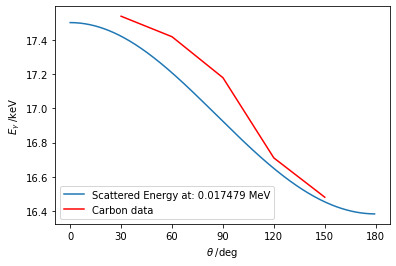

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import scipy.optimize as opt
from scipy.optimize import minimize, least_squares
from scipy.constants import e, h, hbar, alpha, c, m_e
DPI = 100

# A bunch of constants factored into a single variable. This is half the classical electron radius
f = (hbar * alpha / m_e / c)**2 / 2
# A grid of scattering angles in rad.
theta = np.arange(0, 2*np.pi, 0.01)
n = len(theta)
# factor to take degrees to radians because its stupid
a = np.pi/180

# get experimental data
x = [] # thetas
y = [] # energies
z = [] # errors

with open('Carbon.csv') as File:  
    Line_reader = csv.reader(File, delimiter=',')
    for row in Line_reader:
        x.append(float(row[0]))
        y.append(float(row[1]))
        z.append(float(row[2]))

def energy_shift(E,phi):
    # Incoming photon frequency (s^-1) and wavelength (m).
    nu = E * 1.e6 * e / h
    lam = c / nu

    # Scattered photon wavelength (m).
    lamp = lam + h / m_e / c * (1 - np.cos(phi*a))
    
    # Scattered photon energy (J)
    Ep = h*c / lamp
    # Scattered photon energy (eV)
    EpeV = Ep / 1.6e-16
    return EpeV
        
#write function to compute chi-squared as a function of a scaling factor l
def chi(Egrid):
    E = Egrid
    chiSquare = 0
    for i,b in enumerate(x):
        chiSquare = chiSquare + (energy_shift(E,b)-y[i])**2 / z[i]**2
        print(chiSquare)
    print(chiSquare)
    return chiSquare


def plot_energy_shift(E):
    """Plot the Compton scattered energy for incoming photon energy, E."""

    # Incoming photon frequency (s^-1) and wavelength (m).
    nu = E * 1.e6 * e / h
    lam = c / nu

    # Scattered photon wavelength (m).
    lamp = lam + h / m_e / c * (1 - np.cos(theta))
    
    # Scattered photon energy (J)
    Ep = h*c / lamp
    # Scattered photon energy (eV)
    EpeV = Ep / 1.6e-16

    # Plot Energy
    ax2.plot(np.degrees(theta[:n//2]), EpeV[:n//2],
             label='Scattered Energy at: ' + str(E) + r' MeV')
    
# A Matplotlib figure with a polar Axes above a Cartesian one.
fig, ax2 = plt.subplots()

# Our grid of photon energies (in MeV).
Egrid = 0.017479

chi(Egrid)

plot_energy_shift(Egrid)
ax2.set_xlabel(r'$\theta\;/\mathrm{deg}$')
ax2.set_ylabel(r'$E_\gamma\;/\mathrm{keV}$')
# Set the Cartesian x-axis ticks to sensible values (in degrees).
ax2.set_xticks([0, 30, 60, 90, 120, 150, 180]);

# plot experimental data
plt.plot(x,y,color='r',label="Carbon data")

plt.legend()
plt.show()
